In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The k-means algorithm

**Contents**

- [k-means step-by-step example](#1.-k-means-steps-by-step-example)
- [Inertia](#2.-Inertia)
- [k-means implementation](#3.-k-means-implementation)
- [Finding the optimal number of clusters: the elbow method](#4.-Finding-the-optimal-number-of-clusters:-the-elbow-method)
- [Demonstration of k-means assumptions](#5.-Demonstration-of-k-means-assumptions)

## 1. k-means steps-by-step example

Consider the following unlabeled dataset

Text(0.5, 1.0, 'Four-blobs Dataset')

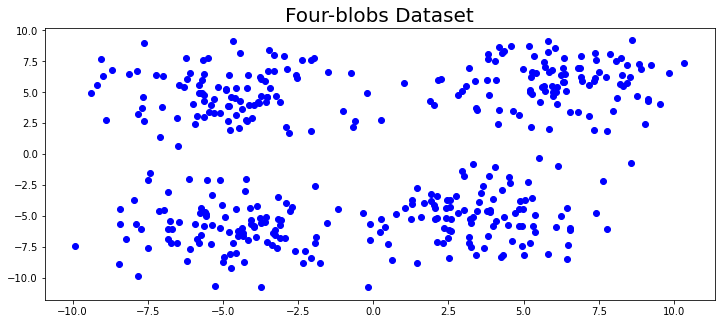

In [2]:
'four-blobs dataset'
X = np.zeros((400,2)) #2 features; 400 data points
X[0:100] =   2*np.random.randn(100,2) + [-5,5] # blob 1
X[100:200] = 2*np.random.randn(100,2) + [4,-5] # blob 2
X[200:300] = 2*np.random.randn(100,2) + [6,6] # blob 3
X[300:400] = 2*np.random.randn(100,2) + [-5,-6]

'plot dataset'
plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'bo')
plt.title('Four-blobs Dataset',fontsize=20)

We can clearly see four blobs (clusters). 
The k-means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly.

First, we have to specify the number of clusters k that the algorithm must find. 
In this example, it is pretty obvious from looking at the data that $k$ should be set to 4. 
In general, choosing k is not that easy. 
We will discuss this shortly.

In [3]:
# number of clusters
k = 4 

**Initialization:** We randomly sample k points from the dataset. 
These are the initial k means.

In [32]:
m = X.shape[0] # number of data points
means = X[np.random.choice(m,k)] # initial k means

In [33]:
means

array([[-1.90105744, -6.69299261],
       [ 6.23579316, -4.95932838],
       [ 2.01771739,  3.94928108],
       [ 3.88977423, -4.53586769]])

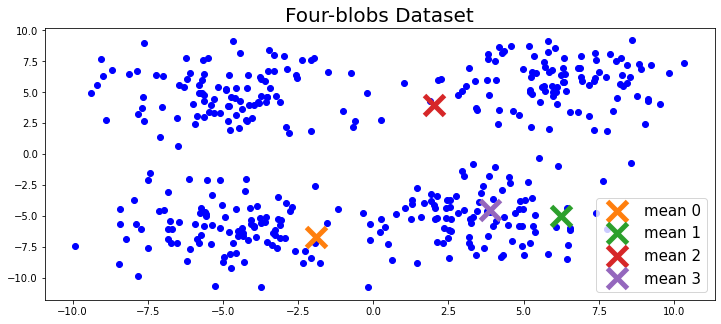

In [34]:
'plot dataset'
plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'bo')
plt.title('Four-blobs Dataset',fontsize=20)

'plot the initial k means'
colors = ['C1', 'C2', 'C3', 'C4'] # default matplotlib colors; Javier likes them
for i in range(k):
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5, label='mean '+str(i))
plt.legend(fontsize=15)

**Step 1:** Assign each point to the mean to which it is closest. 

In [36]:
distances = np.sum(X**2,axis=1)[:,None]+np.sum(means**2,axis=1)[None,:]-2*X.dot(means.T)
distances

array([[137.83763311, 139.31621808,   5.93517748, 106.3634633 ],
       [200.09254642, 310.27379769,  91.27744899, 243.22473001],
       [147.4051701 , 199.8564681 ,  31.71783177, 151.42266444],
       ...,
       [  2.81321082,  99.92369533, 152.63535753,  61.58525232],
       [ 16.93870804,  72.61236569,  58.30980673,  37.8896593 ],
       [  9.93172052, 102.39157458, 101.25990196,  60.09794986]])

In [37]:
clusters = np.argmin(distances, axis=1)

In [38]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 0, 3, 1, 3, 3, 3,
       3, 1, 3, 0, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 0,
       1, 1, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

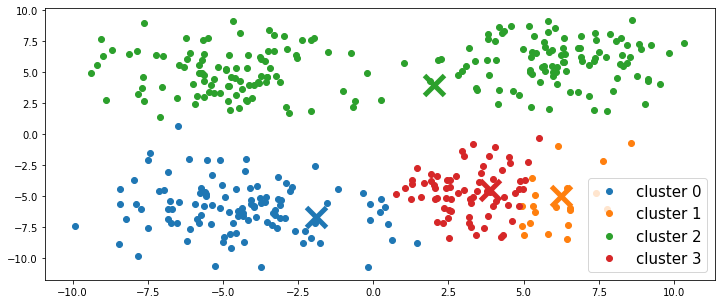

In [39]:
# plot clusters
colors = ['C0', 'C1', 'C2', 'C3']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)

**Step 2:** We update the cluster means 

In [40]:
# compute the mean (centroid) of each cluster
means = np.array([np.mean(X[clusters==i], axis=0) for i in range(k)])
means 

array([[-4.4168296 , -5.99399788],
       [ 6.16905457, -5.46782038],
       [ 0.65327296,  5.42774828],
       [ 3.17765114, -4.65146755]])

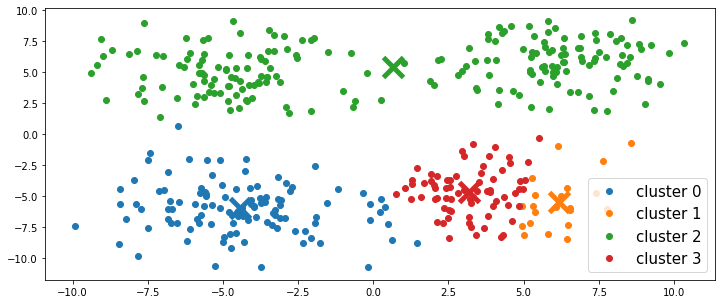

In [41]:
# plot clusters
colors = ['C0', 'C1', 'C2', 'C3']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)

We repeat steps 1 and 2 until the means stop moving.

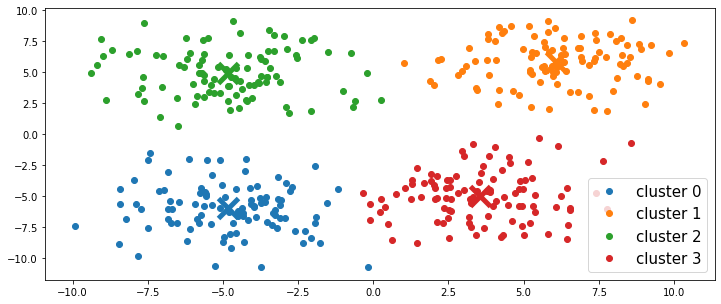

In [51]:
'repeat steps 1 and 2'

# step 1: assign each point to the closest mean
distances = np.sqrt(np.sum(X**2,axis=1)[:,None]+np.sum(means**2,axis=1)[None,:]-2*X.dot(means.T))
clusters = np.argmin(distances, axis=1)

# step 2: update cluster means
means = np.array([np.mean(X[clusters==i], axis=0) for i in range(k)])

# plot clusters
colors = ['C0', 'C1', 'C2', 'C3']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)

## 2. Inertia

The K-means algorithm aims to choose clusters that minimise the **inertia**, or within-cluster sum-of-squares criterion:

The **inertia** is the mean squared distance between each dataset point and its closest cluster mean.
If we denote by $C_i$ the $i$th cluster and by $m_i$ the center (the mean) of $C_i$, the inertia is given by
$$
\mbox{inertia} = \frac{1}{m}\sum_{i=1}^k \sum_{x\in C_i} \|x-m_i\|_2^2,
$$
where $m$ is the size of the dataset.

Inertia can be recognized as a measure of how internally coherent clusters are.
Lower inertia values are better and zero is optimal

In [52]:
np.sum([np.sum((X[clusters==i]-means[i])**2) for i in range(k)])/m

7.404314053744003

## 3. k-means implementation

In [53]:
def kmeans(X,k,max_iterations=1000, return_inertia=False):
    
    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initialization
    means = X[np.random.choice(m,k)] 
    distances = np.sum(X**2,axis=1)[:,None]+np.sum(means**2,axis=1)[None,:]-2*X.dot(means.T)
    clusters = np.argmin(distances, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update clusters
        distances = np.sum(X**2,axis=1)[:,None]+np.sum(means**2,axis=1)[None,:]-2*X.dot(means.T)
        new_clusters = np.argmin(distances, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
    
    
    results = {'clusters' : clusters, 'means' : means}
    # compute inertia
    if return_inertia:
        results['inertia'] = np.sum([np.sum((X[clusters==i]-means[i])**2) for i in range(k)])/m
    
    return results

In [54]:
# check that it works 
k = 4
results = kmeans(X,k)

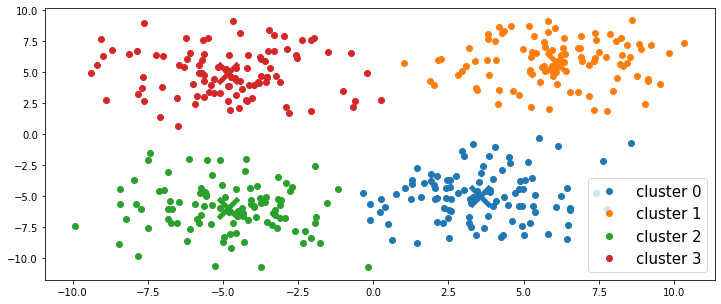

In [55]:
clusters = results['clusters']
means = results['means']
# plot clusters
colors = ['C0', 'C1', 'C2', 'C3']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)

## 4. Finding the optimal number of clusters: the elbow method

So far, we have set the number of clusters k to 4 because it was obvious by looking at the data that this was the correct number of clusters.
But in general, it will not be so easy to know how to set 4, and the result might be quite bad if you set it to the wrong value.

As you can see below, setting k to 3 or 6 results in fairly bad clusters.

**Example 1:** when k is too small, separate clusters get merged

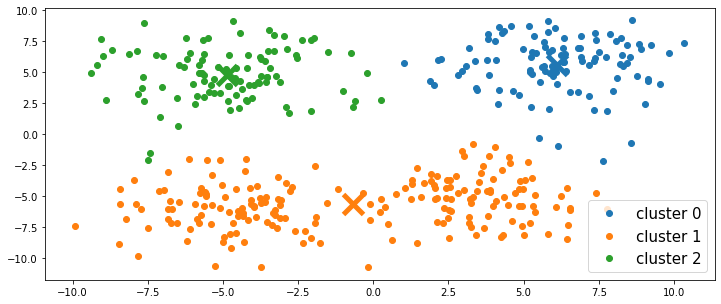

In [56]:
# run k-means
k = 3
results = kmeans(X,k)
clusters = results['clusters']
means = results['means']
# plot clusters
colors = ['C0', 'C1', 'C2']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)

**Example 2:** when k is too large, some clusters get chopped into multiple pieces

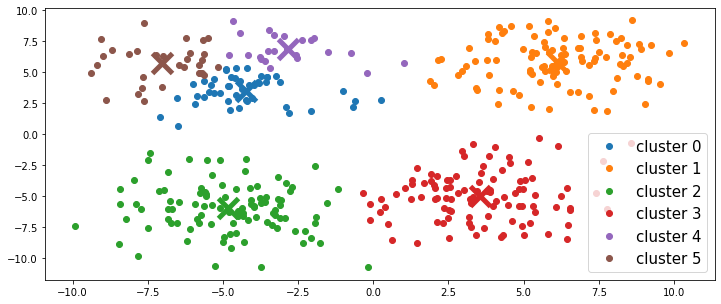

In [57]:
# run k-means
k = 6
results = kmeans(X,k)
clusters = results['clusters']
means = results['means']
# plot clusters
colors = ['C0', 'C1', 'C2','C3','C4','C5']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)

One way to choose the number of clusters is to run the k-means algorithm multiple times with different values for k, and plot the inertia as a function of k.

When plotting the inertia as a function of the number of clusters  k, the curve often contains an inflexion point called **the elbow**.

Text(0, 0.5, 'inertia')

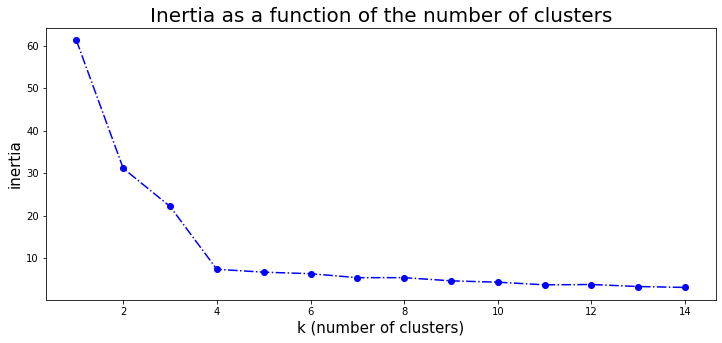

In [58]:
k_list = np.arange(1,15)
inertias = np.zeros(len(k_list))
for i in range(len(k_list)):
    k = k_list[i]
    results = kmeans(X,k,return_inertia=True)
    inertias[i] = results['inertia']
    
plt.figure(figsize=(12,5))
plt.plot(k_list,inertias,'bo-.')
plt.title('Inertia as a function of the number of clusters',fontsize=20)
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

As you can see, the inertia drops very quickly as we increase k up to k=4, but then it decreases much more slowly as we keep increasing  k.
This curve has roughly the shape of an arm, and there is an elbow at k=4.
So, if we did not know better, k=4  would be a good choice: any lower value would be dramatic, while any higher value would not help much.

## 5. Demonstration of k-means assumptions

The k-means algorithm makes the assumption that clusters are [**convex**](https://en.wikipedia.org/wiki/Convex_set) and [**isotropic**](https://en.wikipedia.org/wiki/Isotropy), which is not always the case. It responds poorly to elongated clusters, or clusters with irregular shapes.

The following examples are meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters

**Example 1:** Anisotropicly distributed data (i.e., elongated clusters)

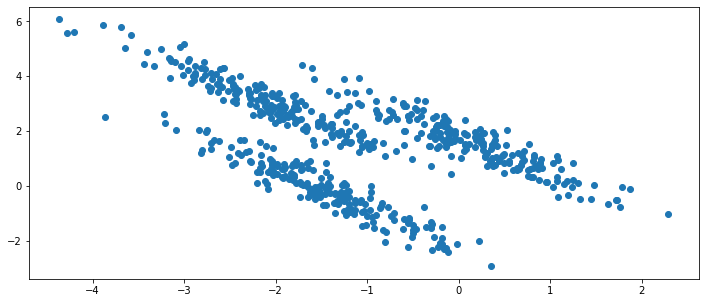

In [59]:
# three-elongated-blobs dataset

X = np.zeros([600,2])
transformation = np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])

X[0:200] = np.random.randn(200,2) + [-2,2]
X[200:400] = np.random.randn(200,2) + [3,4]
X[400:600] = np.random.randn(200,2) + [-5,-4]

X = X.dot(transformation)
plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'o')

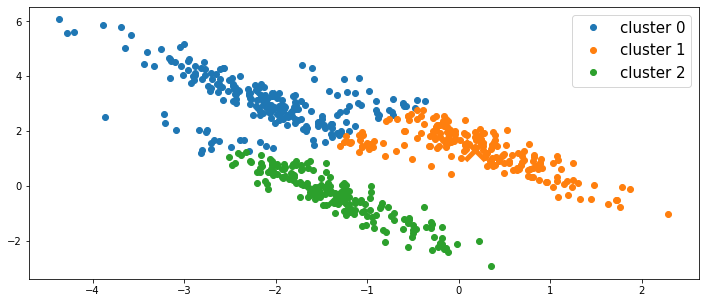

In [60]:
k = 3
results = kmeans(X,k)
clusters = results['clusters']
means = results['means']
# plot clusters
colors = ['C0', 'C1', 'C2','C3','C4','C5']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)

**Example 2:** Clusters with irregular shapes.

**Moons dataset**

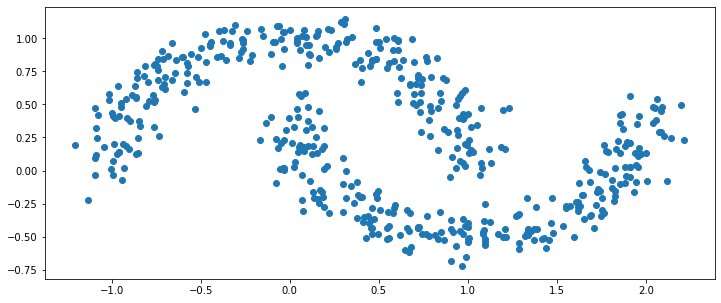

In [61]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.1)

plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'o')

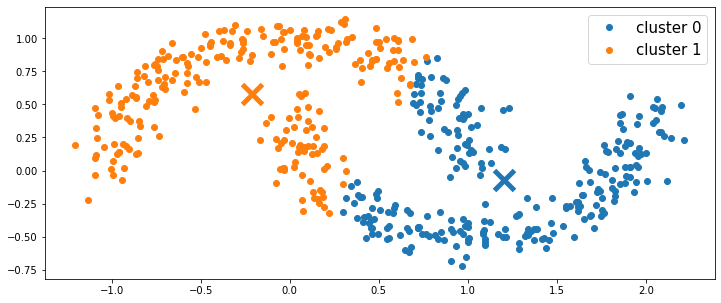

In [62]:
k = 2
results = kmeans(X,k)
clusters = results['clusters']
means = results['means']
# plot clusters
colors = ['C0', 'C1', 'C2','C3','C4','C5']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)

**Circles dataset**

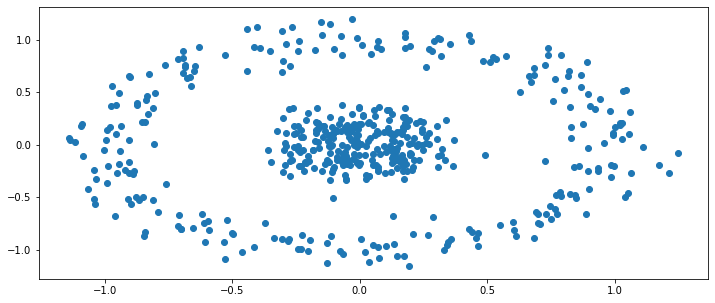

In [63]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500,noise=0.1, factor=0.2)


plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'o')

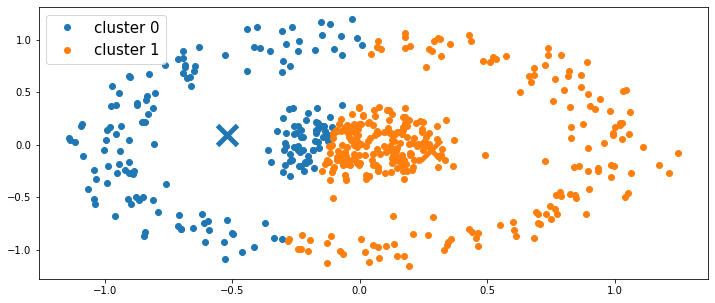

In [64]:
k = 2
results = kmeans(X,k)
clusters = results['clusters']
means = results['means']
# plot clusters
colors = ['C0', 'C1', 'C2','C3','C4','C5']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)